### Algorithmic Machine Learning Challenge

## Plankton Image Classification

For the Plankton Classification problem we will experiment two of the suggested approaches. depeneding on their performances and costs, we will decide whether we combine both of them or privilege one of them.

## Plan:

1 Features-based Classifier

1-1 Data Exploration

1-2 Data Pre-processing

1-3 Model Selection

2 Deep Learning Classifier

2-1 Data Exploration

2-2 Data Pre-processing

2-3 Model Selection

3 Conclusion

## 1. Features-based Classifier

### 1.1 Data Exploration 

We first import the necessary packages

In [2]:
%matplotlib inline
import os
import sys

import random
import matplotlib


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
import scipy as sp
import bokeh as bk
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier

base ="/mnt/datasets/plankton/flowcam/"

We load the data : 

In [5]:
# Read the .csv file 
metaDF = pd.read_csv(base + 'meta.csv')
taxoDF = pd.read_csv(base + 'taxo.csv')
nativeDF = pd.read_csv(base +'features_native.csv.gz', compression='gzip')
processedDF = pd.read_csv(base +'features_skimage.csv.gz', compression='gzip')

In [6]:
metaDF[:10] #index of images and their corresponding labels

,objid,projid,id,status,latitude,longitude,objdate,objtime,depth_min,depth_max,unique_name,lineage,level1,level2
0,32756761.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,detritus,/#/not-living/detritus,detritus,detritus
1,32759364.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,detritus,/#/not-living/detritus,detritus,detritus
2,32758055.0,133,28299,V,43.683333,7.3,2013-09-19,00:09:00,0,75,Guinardia,/#/living/Eukaryota/Harosa/Stramenopiles/Ochro...,Guinardia,Rhizosolenids
3,32758988.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,silks,/#/not-living/plastic/other/silks,silks,silks
4,32760598.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,silks,/#/not-living/plastic/other/silks,silks,silks
5,32760828.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,detritus,/#/not-living/detritus,detritus,detritus
6,32760820.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,detritus,/#/not-living/detritus,detritus,detritus
7,32758467.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,silks,/#/not-living/plastic/other/silks,silks,silks
8,32760505.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,silks,/#/not-living/plastic/other/silks,silks,silks
9,32760693.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,silks,/#/not-living/plastic/other/silks,silks,silks


In [7]:
level2 = metaDF['level2'].nunique()
print("Total n. of level2: ", level2)

Total n. of level2:  39


In [8]:
taxoDF[:10] #taxonomic tree and its potential groupings at various level.

,levelName,id,unique_name,n,level1,comment1,level2,comment2
0,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¦--living,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,¦ ¦--Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,¦ ¦ °--Cyanobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,¦ ¦ °--Cyanophyceae,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,¦ ¦ °--Trichodesmium,8976.0,Trichodesmium,2.0,NaN,NaN,NaN,NaN
6,¦ ¦--Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,¦ ¦ ¦--Harosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,¦ ¦ ¦ ¦--Alveolata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,¦ ¦ ¦ ¦ ¦--Ciliophora,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nativeDF[:10] # morphological handcrafted features computed by ZooProcess

,objid,area,meanimagegrey,mean,stddev,min,perim.,width,height,major,...,symetriev_area,nb1_area,nb2_area,nb3_area,nb1_range,nb2_range,nb3_range,median_mean,median_mean_range,skeleton_area
0,32756761.0,6653.0,167.18,205.76,65.341,85,779.66,109,123,147.8,...,0.005988,0.017964,0.017964,0.059880,0.017647,0.017647,0.058824,47,0.276471,91.778443
1,32759364.0,1275.0,165.83,234.29,38.562,98,186.99,33,65,82.4,...,0.012048,0.024096,0.012048,0.006024,0.025478,0.012739,0.006369,21,0.133758,18.030120
2,32758055.0,2416.0,167.92,239.15,25.590,94,276.33,26,115,138.8,...,0.017857,0.011905,0.053571,0.107143,0.012422,0.055901,0.111801,16,0.099379,24.892857
3,32758988.0,1433.0,167.34,248.79,20.933,107,388.40,126,117,151.2,...,0.005988,0.000000,0.000000,0.023952,0.000000,0.000000,0.027027,6,0.040541,99.365269
4,32760598.0,1650.0,166.89,250.42,14.603,124,751.96,66,239,278.7,...,0.017964,0.029940,0.083832,0.059880,0.038168,0.106870,0.076336,5,0.038168,109.449102
5,32760828.0,11200.0,166.39,221.26,55.169,76,1361.04,197,146,231.3,...,0.006024,0.078313,0.072289,0.072289,0.072626,0.067039,0.067039,33,0.184358,190.180723
6,32760820.0,8726.0,156.03,234.44,34.530,89,1610.45,160,186,218.9,...,0.006410,0.064103,0.217949,0.173077,0.060241,0.204819,0.162651,17,0.102410,208.923077
7,32758467.0,2158.0,167.32,250.72,11.956,131,1013.26,70,235,274.2,...,0.011976,0.059880,0.017964,0.011976,0.080645,0.024194,0.016129,4,0.032258,113.497006
8,32760505.0,1650.0,167.81,247.04,19.333,107,594.49,30,264,306.9,...,0.029762,0.017857,0.017857,0.011905,0.020270,0.020270,0.013514,8,0.054054,61.523810
9,32760693.0,1365.0,167.59,252.11,10.563,120,667.28,134,204,239.2,...,0.011905,0.041667,0.041667,0.047619,0.051852,0.051852,0.059259,3,0.022222,179.190476


In [10]:
processedDF[:10] # morphological features recomputed with skimage.measure.regionprops

,objid,area,convex_area,eccentricity,equivalent_diameter,euler_number,filled_area,inertia_tensor0,inertia_tensor1,inertia_tensor2,...,weighted_moments_normalized6,weighted_moments_normalized7,weighted_moments_normalized8,weighted_moments_normalized9,weighted_moments_normalized10,weighted_moments_normalized11,weighted_moments_normalized12,weighted_moments_normalized13,weighted_moments_normalized14,weighted_moments_normalized15
0,32588204.0,1280.0,1847.0,0.998732,40.370120,1,1280.0,101.683506,-457.457683,-457.457683,...,122988.160150,59341.570582,5.206276e+05,26602.640746,12729.157425,1547.426179,5.714891e+03,2.803411e+03,328.453206,99.648803
1,32718824.0,1344.0,2245.0,0.695802,41.367064,-3,1456.0,205.937964,-25.679712,-25.679712,...,-5333.640261,100.818064,9.227797e+05,-460.571019,479.826559,1.421619,7.427521e+03,3.060606e+02,-5.929098,0.174156
2,32741900.0,7728.0,13024.0,0.909170,99.194734,-14,7867.0,343.887100,-101.515634,-101.515634,...,-413.769431,278.171044,2.002588e+05,386.091691,130.204406,-4.194633,-5.886338e+02,1.774976e+01,-0.462406,0.090115
3,32646541.0,1062.0,1913.0,0.848934,36.772006,-7,1205.0,148.677328,-97.739826,-97.739826,...,-25850.497383,3378.927523,1.332890e+06,-22336.179894,3371.624781,-126.787468,-1.397839e+04,2.990149e+03,-130.973314,12.434369
4,32559106.0,2815.0,13045.0,0.997804,59.867932,-9,2857.0,14494.775366,-6980.991977,-6980.991977,...,-227212.175165,353222.917235,4.380302e+07,-681642.066165,738500.898713,-25913.614190,-1.722409e+06,1.565785e+06,-63725.112865,31710.953027
5,32672224.0,2555.0,7119.0,0.919263,57.036191,-4,2565.0,361.844413,-386.745817,-386.745817,...,40641.536553,10134.353494,9.764097e+05,22913.690308,4207.019822,256.650839,1.213315e+04,2.024511e+03,143.438746,18.146233
6,32612601.0,3588.0,4336.0,0.371870,67.589818,1,3588.0,316.783686,-22.440903,-22.440903,...,82.480755,77.831495,3.862266e+05,-150.570326,97.233138,0.212994,9.452167e+01,-2.484322e+01,0.227973,0.014146
7,32704866.0,2432.0,2555.0,0.636604,55.646371,0,2435.0,150.243505,5.089905,5.089905,...,-225.820910,-7.160778,3.036557e+05,-314.080512,100.545193,-0.141898,1.186334e+02,-8.249363e+00,-0.081009,-0.004614
8,32634948.0,2221.0,2566.0,0.691259,53.177674,-1,2229.0,180.980299,-59.368093,-59.368093,...,430.780302,145.621105,3.861819e+05,-98.614903,140.083634,0.502350,-2.100484e+02,7.653234e+01,0.129281,0.085244
9,32726488.0,1547.0,1639.0,0.677575,44.381320,0,1548.0,91.497828,5.895650,5.895650,...,153.026633,-17.172515,2.513955e+05,-165.688029,79.735872,-0.153413,-5.602099e+01,-7.035501e+00,-0.015958,-0.005319


We will plot the distribution of the level-2 taxonomy to get a better understanding of it.

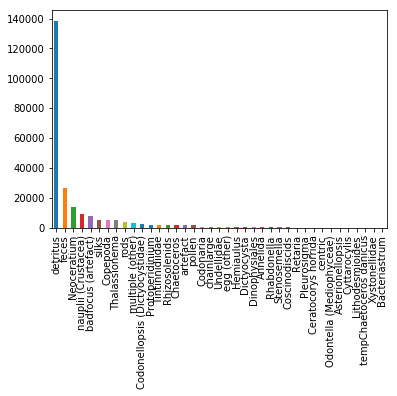

In [11]:
metaDF['level2'].value_counts().plot(kind='bar')

We can see that our data is very imbalanced : there is a lot more instances of detritus than any other class, while some classes have almost no observations.

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


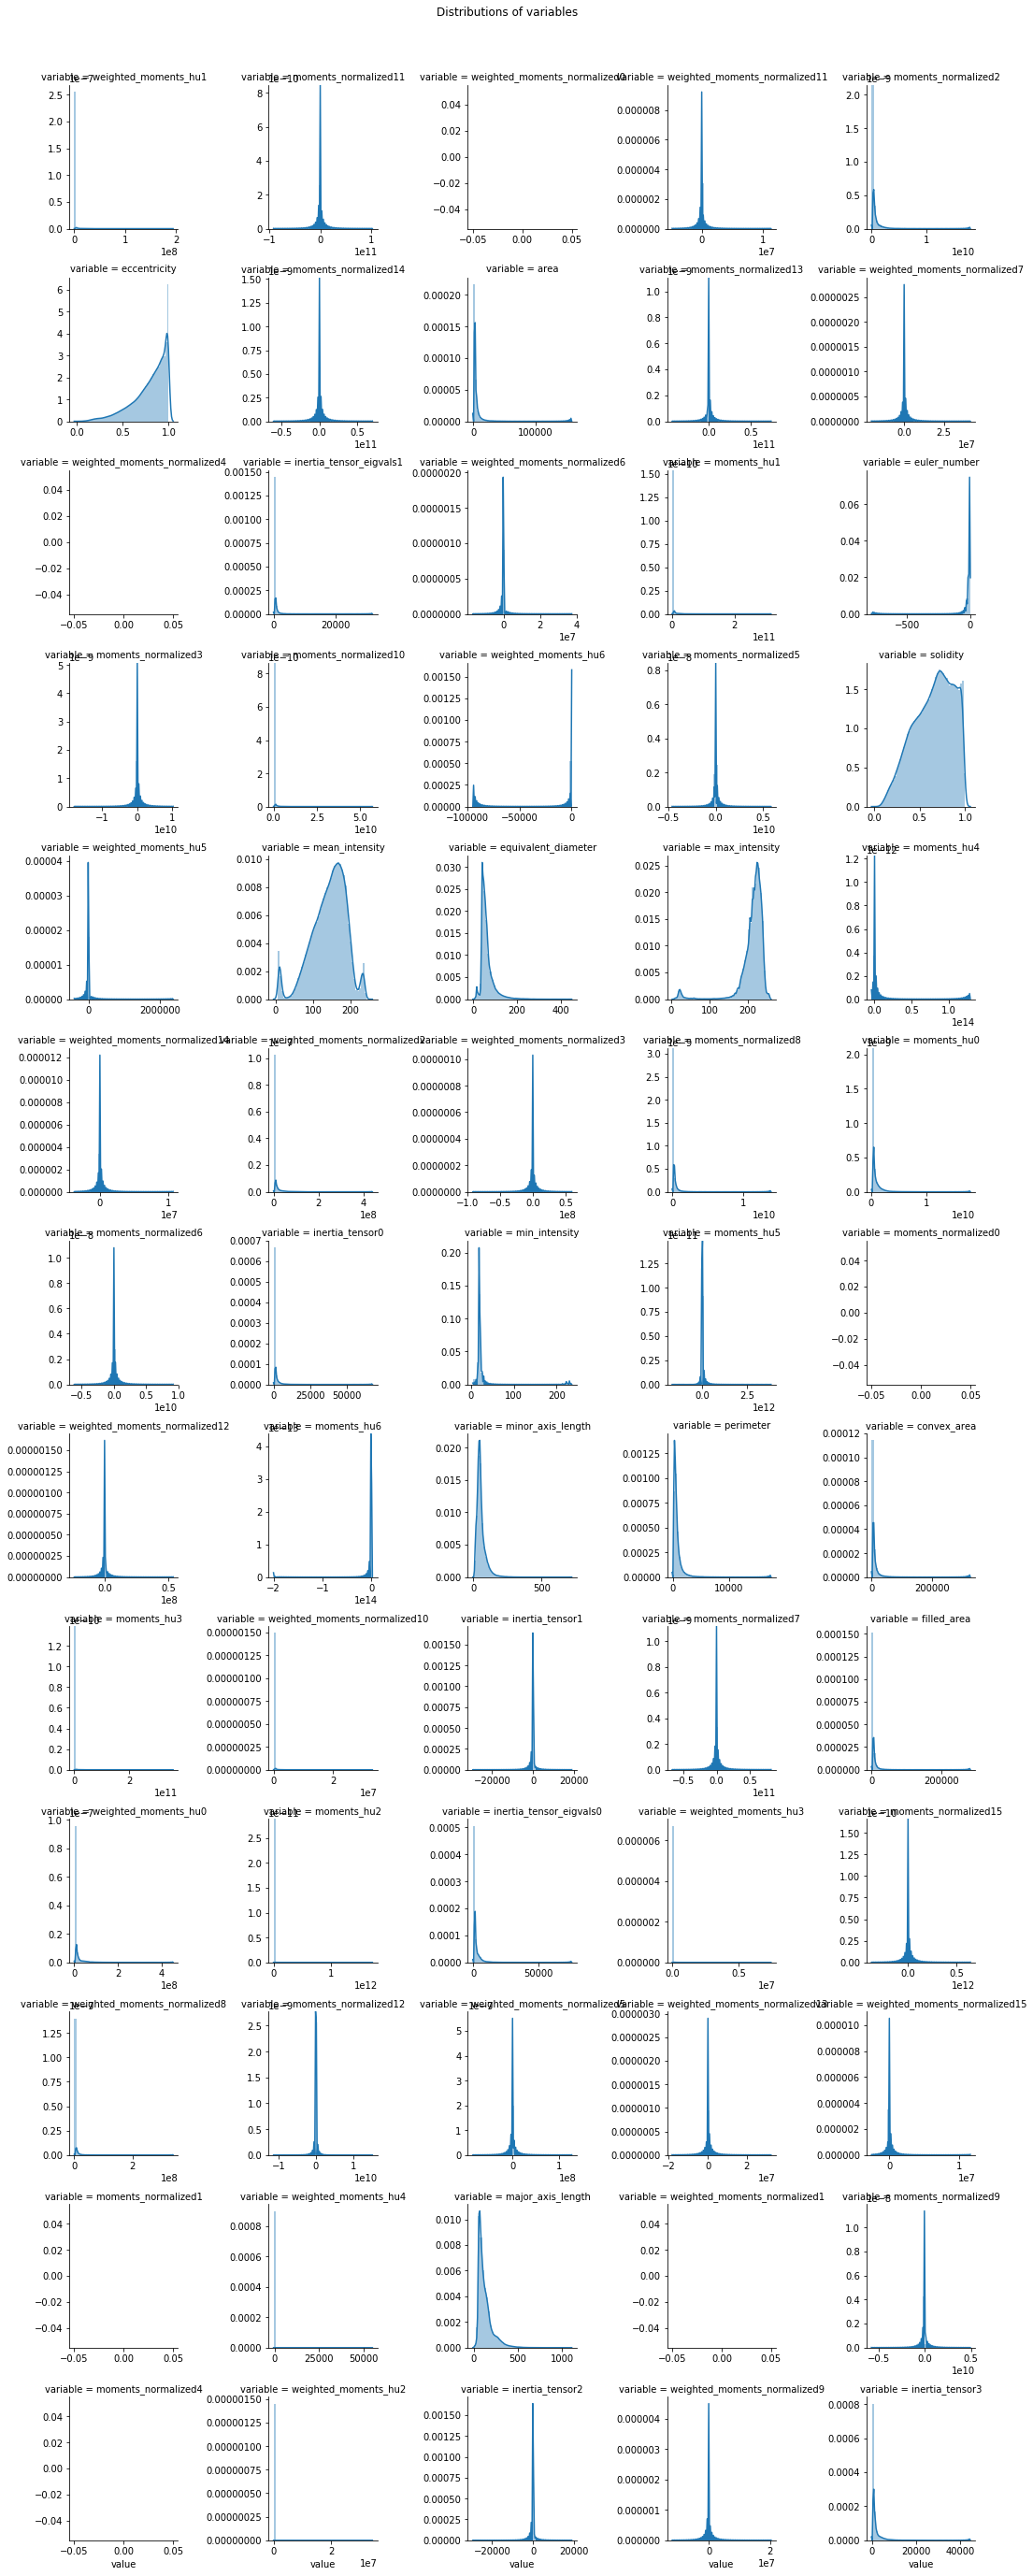

In [13]:
#Select quantitative columns
qua_columns = list(set(features_skimageDF.columns)-{'objid'})

#Plot histogram and kde for those columns
f = pd.melt(features_skimageDF, value_vars=qua_columns)
g = sns.FacetGrid(f, col='variable',  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Distributions of variables');

### 1.2 Data Pre-processing

We first take interest into a level2 classifier, so we have to drop rows having NaN values in this column.

In [12]:
missingDF = metaDF[metaDF["level2"].isna()]
print("Number of rows with NaN level2 : "+str(len(missingDF)))

newMetaDF = metaDF.dropna(subset=["level2"])
newNativeDF = nativeDF.merge(right=newMetaDF[["level2","objid"]], how='right', on='objid')
newProcessedDF = processedDF.merge(right=newMetaDF[["level2","objid"]], how='right', on='objid')

print("Size of training set for level2 classifier : "+str(len(newNativeDF)))

del nativeDF
del processedDF
del missingDF

Number of rows with NaN level2 : 1003
Size of training set for level2 classifier : 242607


Let's first cast each column to its respective type.

In [13]:
#Cast columns to respective types
def cast_columns(df) : #return df with casted columns, with types float, int or category
    castedDF = df
    for column in df.select_dtypes("float64").columns :
        castedDF[column] = castedDF[column].astype(np.float64)
    for column in df.select_dtypes("int64").columns :
        castedDF[column] = castedDF[column].astype(np.int64)
    for column in df.select_dtypes("object").columns :
        castedDF[column] = castedDF[column].astype("category")
    return castedDF

newNativeDF = cast_columns(newNativeDF)
newProcessedDF = cast_columns(newProcessedDF)

Then we deal with missing values in our datasets.

In [14]:
# Compute number of missing values per attribute in the native training set
nativeSize = len(newNativeDF)
print("Size of training set : "+str(nativeSize))
for label in newNativeDF.columns : 
    value_count = newNativeDF[label].count()
    if newNativeDF[label].count() != nativeSize :
        print("  Number of missing values in "+label+" in training dataset : "+str(nativeSize-newNativeDF[label].count()))
print("\n")

Size of training set : 242607
  Number of missing values in perimareaexc in training dataset : 34302
  Number of missing values in feretareaexc in training dataset : 34302
  Number of missing values in cdexc in training dataset : 34302
  Number of missing values in convarea_area in training dataset : 6854
  Number of missing values in symetrieh_area in training dataset : 6854
  Number of missing values in symetriev_area in training dataset : 6854
  Number of missing values in nb1_area in training dataset : 6854
  Number of missing values in nb2_area in training dataset : 6854
  Number of missing values in nb3_area in training dataset : 6854
  Number of missing values in skeleton_area in training dataset : 6854




We replace NaN values with the mean value of respective columns.

In [15]:
#return df with nan numerical columns replaced by mean
#df can not have missing categorical values
def fill_nan_with_mean(df) :
    newDF = df
    for column in df.columns :
        if df[column].isnull().values.any() :
            mean = df[column].mean()
            newDF[column] = newDF[column].fillna(mean)
    return newDF

newNativeDF = fill_nan_with_mean(newNativeDF)


In [16]:
# Compute number of missing values per attribute in the processed training set
processedSize = len(newProcessedDF)
print("Size of training set : "+str(processedSize))
for label in newProcessedDF.columns : 
    value_count = newProcessedDF[label].count()
    if newProcessedDF[label].count() != processedSize :
        print("  Number of missing values in "+label+" in training dataset : "+str(processedSize-newProcessedDF[label].count()))
print("\n")

Size of training set : 242607
  Number of missing values in moments_normalized0 in training dataset : 242607
  Number of missing values in moments_normalized1 in training dataset : 242607
  Number of missing values in moments_normalized4 in training dataset : 242607
  Number of missing values in weighted_moments_normalized0 in training dataset : 242607
  Number of missing values in weighted_moments_normalized1 in training dataset : 242607
  Number of missing values in weighted_moments_normalized4 in training dataset : 242607




Those columns do not contain any data, so we can drop them.

In [17]:
newProcessedDF = newProcessedDF.drop(axis=1, labels=["moments_normalized0","moments_normalized1","moments_normalized4","weighted_moments_normalized0",
                                      "weighted_moments_normalized1","weighted_moments_normalized4"])

### 1.3 Model Selection

Our dataset only contains numerical values, so the pipeline is quite straightforward.

In [20]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

transformer = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('scaler', StandardScaler()),
        ])),  # numericals close
    ])),  # features close
])  # pipeline close

In [21]:
from sklearn.linear_model import *
from sklearn.ensemble import *

class SparseToDenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.toarray()

def train_default_estimators(X_train,Y_train,X_test,Y_test) :
    #Train several classifier with default parameters on (X_train,Y_train), print their scores on (X_test_Y_test) and return array of estimators
    #For now, gradientBoosting, gaussianProcess and Logistic Regression do not work, might be added in the future
    
    randomForestPredictor = Pipeline([('transform', transformer),
                                   ('classifier', RandomForestClassifier(random_state=42))])
    randomForestPredictor.fit(X_train ,Y_train)
    print("Random Forest")
    print(randomForestPredictor.score(X_test,Y_test))
    print("\n")

    baggingPredictor = Pipeline([('transform', transformer),
                                    ('classifier', BaggingClassifier())])
    baggingPredictor.fit(X_train ,Y_train)
    print("Bagging")
    print(baggingPredictor.score(X_test,Y_test))
    print("\n")

    extraTreesPredictor = Pipeline([('transform', transformer),
                                    ('classifier', ExtraTreesClassifier())])
    extraTreesPredictor.fit(X_train ,Y_train)
    print("extraTrees")
    print(extraTreesPredictor.score(X_test,Y_test))
    print("\n")

    ridgeCVPredictor = Pipeline([('transform', transformer),
                                   ('classifier', RidgeClassifierCV())])
    ridgeCVPredictor.fit(X_train ,Y_train)
    print("RidgeCV")
    print(ridgeCVPredictor.score(X_test,Y_test))
    print("\n")


    passiveAggressivePredictor = Pipeline([('transform', transformer),
                                    ('classifier', PassiveAggressiveClassifier())])
    passiveAggressivePredictor.fit(X_train ,Y_train)
    print("Passive-Aggressive")
    print(passiveAggressivePredictor.score(X_test,Y_test))
    print("\n")


    sgdPredictor = Pipeline([('transform', transformer),
                                    ('classifier', SGDClassifier())])
    sgdPredictor.fit(X_train ,Y_train)
    print("SGD")
    print(sgdPredictor.score(X_test,Y_test))
    print("\n")
    
    return [randomForestPredictor, sgdPredictor, passiveAggressivePredictor, ridgeCVPredictor, extraTreesPredictor, baggingPredictor]

Let's first train our default classifiers with the native dataset.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(newNativeDF.drop("level2",axis=1), newNativeDF["level2"], test_size=0.2, stratify=newNativeDF["level2"])
native_estimators = train_default_estimators(X_train, Y_train, X_test, Y_test)

In [ ]:
Xp_train, Xp_test, Yp_train, Yp_test = train_test_split(newProcessedDF.drop("level2",axis=1), newProcessedDF["level2"], test_size=0.2, random_state=42)
native_estimators = train_default_estimators(Xp_train, Yp_train, Xp_test, Yp_test)

In [ ]:
## Discuss the choice of model here : why tree-based algorithm ? RandomForest/Bagging ? native or processed features ? 

In [ ]:
We use a grid-search cross-validation algorithm to optimize our random forest algorithm.

In [ ]:
hyperparameters = {'classifier__max_features' : [0.1, 0.2, 0.05],
                  'classifier__min_samples_leaf' : [30, 50, 80, 100, 200, 1000],
                  'classifier__oob_score' :[True, False ]}

randomForestPredictor = Pipeline([('transform', transformer),
                                   ('classifier', RandomForestClassifier(random_state=42))])

crossedRandomForest = GridSearchCV(randomForestPredictor, hyperparameters, scoring='accuracy',)
 
# Fit and tune model
crossedRandomForest.fit(X_train, Y_train)
print(crossedRandomForest.score(X_test,Y_test))

## 2. Deep Learning Classifier

### 2.1 Data Exploration

load the images to memory:

In [3]:
import zipfile
from io import BytesIO
from PIL import Image

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}

img_files = extract_zip_to_memory(base+"imgs.zip")


# Load the image as a numpy array:
# np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))



In [6]:
#Size of the set
print('There is: ' +str(len(img_files))+ ' image in the data set. ')

There is: 243610 image in the data set. 


Let's have a look to what the data really looks like:

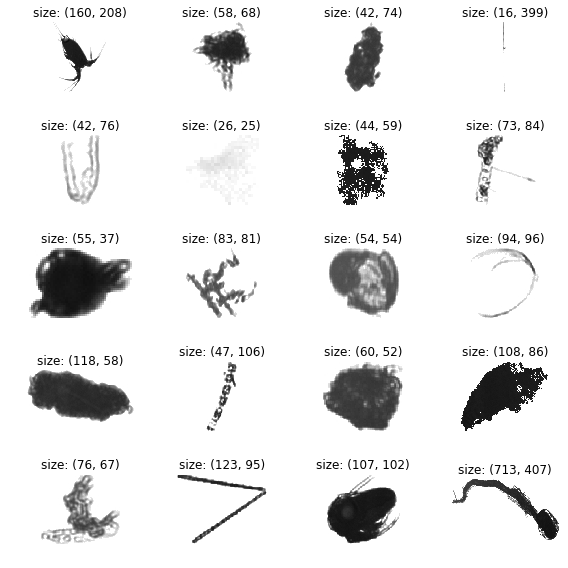

In [16]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i,id in zip(range(1, columns*rows +1),img_files.items()):
    img=Image.open(img_files[id[0]])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title("size: "+str(Image.open(img_files[id[0]]).size))
    plt.axis('off') # do not show axis value
plt.tight_layout() 
plt.show()

2 important characteristics show up : We can notice the important variability in the shapes of figures and the sizes of images, and all the images are black and white. This is going to have an impact during the preprocessing and the model choice for the CNN.

here is a numerical insight to the images dimensions:

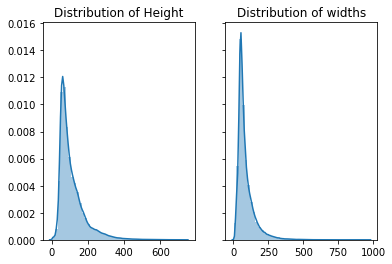

Average Height: 109.33858216000985
Max Height: 739
Min Height: 2


Average Width: 86.62893559377694
Max Width: 972
Min Width: 2


In [17]:
heights = []
widths = []
for id in img_files.items():
    data = np.array(Image.open(img_files[id[0]])) #PIL Image library
    heights.append(data.shape[0])
    widths.append(data.shape[1])

avg_height = sum(heights) / len(heights)
avg_width = sum(widths) / len(widths)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.distplot(heights,ax=ax1)
ax1.set_title('Distribution of Height')
sns.distplot(widths)
ax2.set_title('Distribution of widths')
plt.show()
print("Average Height: " + str(avg_height))
print("Max Height: " + str(max(heights)))
print("Min Height: " + str(min(heights)))
print('\n')
print("Average Width: " + str(avg_width))
print("Max Width: " + str(max(widths)))
print("Min Width: " + str(min(widths)))


We notice that both heights and widths values are concentrated around 100.

Later, for the training process we will need to resize all our images to the same square size. According to the distributions of heights and widths, (100,100) seems a suitable image size.

### 2.2 Data Pre-processing

#### Resizing the images: 

As we noticed in the visualization part, We have many different sizes of images. We will resize all the images to a square unique form of dimensions (100,100) in order to make these images fit in the C-NN. 

First We build our images data frame,and resize the images in the same time.

In [5]:
imagesDF=pd.DataFrame([float(str(i[0].split('/')[1].split('.')[0])+'.0'),np.array(Image.open(img_files[i[0]]).resize((100,100), Image.ANTIALIAS))] for i in img_files.items())

In [ ]:
imagesDF.columns=["objid","image"]

In [ ]:
# a look into our data frame
imagesDF[:5]

We don't need the images dictionary anymore, we can free some space.

In [ ]:
del img_files

We build the labels dataframe.

In [ ]:
labelsDF=metaDF[["objid","level2"]]

In [ ]:
#drop the null values
labelsDF=labelsDF.dropna()

In [ ]:
#a dictionary with corresponding numbers to labels
labDict = {}
for k,label in zip(range(39),labelsDF["level2"].unique()):
                   labDict[label]=k


We associate numerical values to the labels, We will need this later for the model.

In [ ]:
#add a new column with numerical value of the label
labelsDF['level_num']=[labDict[label] for label in labelsDF["level2"]]

In [ ]:
Size = labelsDF['objid'].count()
value_count = labelsDF["level2"].count()
if labelsDF["level2"].count() != Size :
        print("  Number of missing values in level2 in features_skimageDF dataset : "+str(Size-labelsDF["level2"].count()))
print("\n")

We merge the labels dataframe and the images dataframe according the the id of the image.

In [ ]:
df=pd.merge(imagesDF, labelsDF, on='objid')

In [ ]:
df[:5]

In [ ]:
print("number of images in our data set is : ", df['objid'].nunique())

### 2.3 Model Selection

#### CNN

We are going to use the Keras framework for the Convolutional neural network.

In [ ]:
# Install keras library we need for the notebook
!pip3 install --user 'keras'

In [20]:
!pip3 install --user 'np_utils'

You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
#imports for the learning process
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras_preprocessing.image import ImageDataGenerator
import np_utils

We split our data to 2/3 for training and 1/3 for evaluation purposes.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data while keeping classes proportions.
x_train, x_valid, y_train, y_valid = train_test_split(df["image"], df["level_num"], test_size=0.33, shuffle= True,stratify=df["level_num"] )


We adapt the data set for the model : 

In [ ]:
X=np.array(x_train)
X.shape[0]
x_train=np.array([X[i].reshape(100,100,1) for i in range(X.shape[0])]) # the entry of our CNN need to ne 4 dimensions
y_train = keras.utils.np_utils.to_categorical(y_train, 39)


In [ ]:
#free some space
del X

In [ ]:
X=np.array(x_valid)
x_valid=np.array([X[i].reshape(100,100,1) for i in range(X.shape[0])])
y_valid = keras.utils.np_utils.to_categorical(y_valid, 39)

In [ ]:
x_train.shape

In [ ]:
x_valid.shape

In [ ]:
del X

We chose a quite simple CNN in order to reduce the time and computing high cost of the neural network.

Our CNN is composed of 3 main parts : Convolution, Polling and Flattening.

The Convolution allows us to extract features from the input image, while preserving the spatial relationship between pixels. in the model we chose we will use 2 consecutive Convolution operations.

After, Polling reduces the dimensionality of each feature map but retains the most important information.

Given the large dataset We have, we opted not to augment our data and limit the training on the raw images.


In [ ]:
#model 2 : silmpler
IMG_SIZE=100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(IMG_SIZE, IMG_SIZE,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation='softmax'))

In [ ]:
# model 1: if time allows to try it

IMG_SIZE=100

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(39, activation = 'softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


Given the time cost of the C-NN training, We chose to do it on 3 epoches with each epoche taking approximately 50 mins. normally with more epoches we get better accuracy, but that would be time conusming. 

In [32]:
model.fit(x_train, y_train, batch_size = 50, epochs = 2, verbose = 1)

162546/162546 [==============================] - 2983s 18ms/step - loss: 0.4770 - acc: 0.9702
Epoch 2/2
162546/162546 [==============================] - 2985s 18ms/step - loss: 0.4863 - acc: 0.9697


In [32]:
#evaluating the model


loss, acc = model.evaluate(x_valid, y_valid, verbose = 1)
print("Accuracy: ", acc * 100)

80061/80061 [==============================] - 588s 7ms/step
Accuracy:  94.87954551557087


We notice that the accuracy is very high, but this doesn't reflect the goodness of our model. Indeed , accuracy in itself is not informative since it gives no information about the precision and the recall which reflect the unbalanced aspect of the data. Especially given the big percentage of detritus in our dataset.
We need to use a more relvant metrics, for example F1_score as it is recommanded.

In [33]:
y_predict=model.predict(x_valid,verbose=1)

80061/80061 [==============================] - 592s 7ms/step


In [42]:
import sklearn 
f1_macro=sklearn.metrics.f1_score(y_valid, y_predict, average='macro')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print(f1_macro)

0.0015113475974569393


### 2.5. Model Evaluation


#### final score (f1_score)